In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

import seaborn as sns 

In [2]:
iris_data=pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Missing values

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.median()

/Users/albertofernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length_cm    5.70
sepal_width_cm     3.00
petal_length_cm    4.35
petal_width_cm     1.30
dtype: float64

In [6]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [8]:
missing_percentage(iris_data)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000


In [9]:
'''We have only the 3% nulls in the column 'petal_width_cm', so we are going to impute with de mean, because the mean is similar to median.'''

"We have only the 3% nulls in the column 'petal_width_cm', so we are going to impute with de mean, because the mean is similar to median."

In [10]:
iris_data_input = iris_data.copy()
iris_data_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
# Using pandas -> Numeric continuous values

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
type(imputer)

sklearn.impute._base.SimpleImputer

In [12]:
imputer = imputer.fit(iris_data_input[['petal_width_cm']])
imputer.get_params(deep=True)

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'mean',
 'verbose': 0}

In [13]:
iris_data_input['petal_width_cm'] = imputer.transform(iris_data_input[['petal_width_cm']])
missing_percentage(iris_data_input)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.0
sepal_width_cm,sepal_width_cm,0.0
petal_length_cm,petal_length_cm,0.0
petal_width_cm,petal_width_cm,0.0
class,class,0.0


# Encoding Categorical Data

In [14]:
print(iris_data['class'].unique())
len(iris_data['class'].unique())

['Iris-setosa' 'Iris-setossa' 'Iris-versicolor' 'versicolor'
 'Iris-virginica']


5

In [15]:
iris_data['class'] = iris_data['class'].replace('Iris-setossa','Iris-setosa')
iris_data['class'] = iris_data['class'].replace('versicolor','Iris-versicolor')

In [22]:
# One-hot encoding https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
iris_data_one_hot_encoding = pd.get_dummies(iris_data, 
                                          columns=['class'], 
                                          drop_first=False)
iris_data_one_hot_encoding

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,2.3,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# Plot

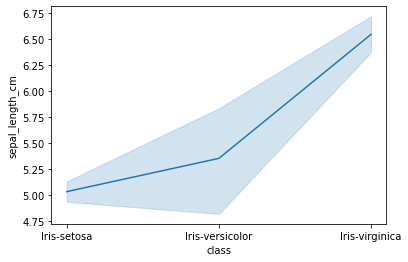

In [17]:
sns.lineplot(x=iris_data['class'], y=iris_data['sepal_length_cm']);

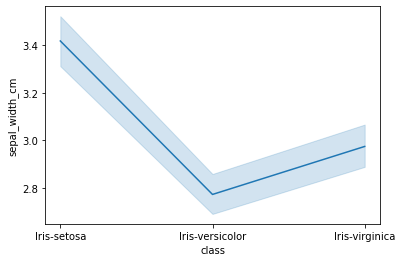

In [18]:
sns.lineplot(x=iris_data['class'], y=iris_data['sepal_width_cm']);

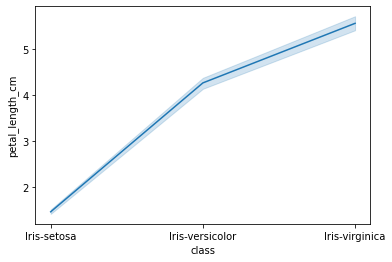

In [19]:
sns.lineplot(x=iris_data['class'], y=iris_data['petal_length_cm']);

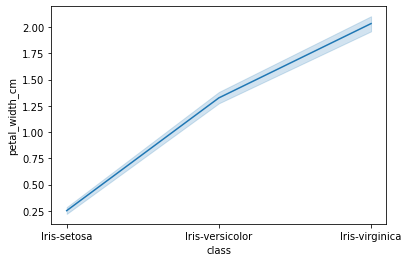

In [20]:
sns.lineplot(x=iris_data['class'], y=iris_data['petal_width_cm']);

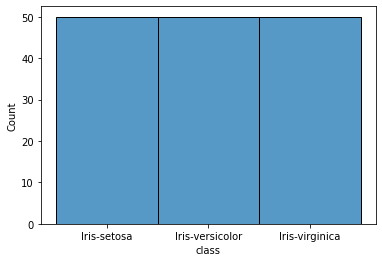

In [21]:
sns.histplot(x=iris_data['class']);